In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kumarrohit16","key":"acaf764ffb5c84cfb040771ca7b239c5"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!/bin/bash
!kaggle datasets download oddrationale/mnist-in-csv

Dataset URL: https://www.kaggle.com/datasets/oddrationale/mnist-in-csv
License(s): CC0-1.0
  0% 0.00/15.2M [00:00<?, ?B/s]
100% 15.2M/15.2M [00:00<00:00, 1.39GB/s]


In [ ]:
!unzip /content/mnist-in-csv.zip

Archive:  /content/mnist-in-csv.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


START

mnist IS A image data where digits are written . it is hello world of ML

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
df=pd.read_csv('/content/mnist_train.csv')

In [ ]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(60000, 785)

In [ ]:
def image_plot(x):
  x=x.reshape(28,28)
  plt.imshow(x,cmap="gray")

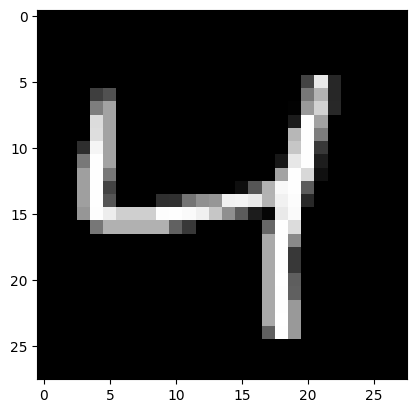

In [ ]:
test=df.values
image_plot(test[2][1:])

In [ ]:
X_train=df.iloc[:,1:].values
y_train=df.iloc[:,0].values
X_train.shape,y_train.shape

((60000, 784), (60000,))

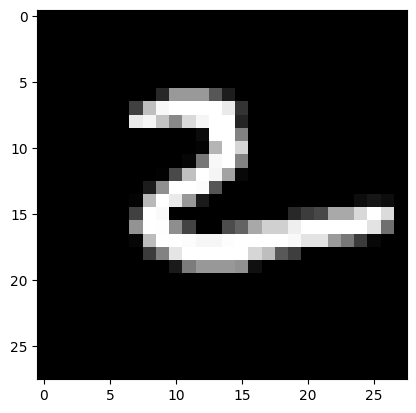

In [ ]:
image_plot(X_train[109])

In [ ]:
y_train[109]

np.int64(2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.2,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((48000, 784), (12000, 784), (48000,), (12000,))

In [ ]:
def distance(x1,x2):
  return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,testing_point,k=7):
  vals=[]
  m=X.shape[0]
  for i in range(m):
    dist=distance(X[i],testing_point)
    vals.append([dist,Y[i]])
  vals=sorted(vals)
  vals=vals[:k]
  vals=np.array(vals)
  new_val=np.unique(vals[:,1],return_counts=True)
  index=new_val[1].argmax()
  ans=new_val[0][index]
  return ans


In [ ]:
pred=[]

for i in tqdm(range(20)):
  pred.append(knn(X_train,y_train,X_test[i]))

100%|██████████| 20/20 [01:11<00:00,  3.60s/it]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=7,n_jobs=-1)
clf.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=7)

In [ ]:
pred2=clf.predict(X_test[:20])

In [ ]:
pred

[np.float64(3.0),
 np.float64(6.0),
 np.float64(6.0),
 np.float64(6.0),
 np.float64(0.0),
 np.float64(3.0),
 np.float64(6.0),
 np.float64(2.0),
 np.float64(5.0),
 np.float64(6.0),
 np.float64(5.0),
 np.float64(8.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(2.0),
 np.float64(2.0),
 np.float64(9.0),
 np.float64(3.0)]

In [ ]:
pred2

array([3, 6, 6, 6, 0, 3, 6, 2, 5, 6, 5, 8, 0, 0, 0, 1, 2, 2, 9, 3])

In [ ]:
(pred==pred2).sum()

np.int64(20)

In [ ]:
y_test


array([3, 6, 6, ..., 5, 1, 6])

In [ ]:
(pred2==y_test[:20])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
(pred2==y_test[:20]).sum()

np.int64(20)

In [ ]:
(pred2==y_test[:20]).sum()/20


np.float64(1.0)

#evaluation matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test[:20],pred2) #labels=["0","1"."2",..,"9"]




array([[4, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 5, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])